# Table of contents
## 1. Setup
## 2. Data Exploration
## 3. Decomposition
## 4. Dickey Fuller test
## 5. Autocorrelation plot

# 1. Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

In [2]:
path = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [3]:
df = pd.read_pickle(os.path.join(path, "df2015_2019_dropped_2.pkl"))

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# 2. Data Exploration

In [5]:
#creating subset of data with relevant columns only
df_sub = df.drop(columns = ["Country", "Happiness Rank", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)",
                           "Freedom", "Trust (Government Corruption)", "Generosity"])
df_sub.head()

,Region,Happiness Score,Year
0,Western Europe,7.587,2015
1,Western Europe,7.561,2015
2,Western Europe,7.527,2015
3,Western Europe,7.522,2015
4,North America,7.427,2015


There is no need to smooth the data, as it was collected on a yearly basis.

In [6]:
#grouping the values by year and region
data = df_sub.groupby (["Region", "Year"])
data.first()

Happiness Score
Region                          Year                 
Australia and New Zealand       2015            7.286
                                2016            7.334
                                2017            7.314
                                2018            7.324
                                2019            7.307
Central and Eastern Europe      2015            6.505
                                2016            6.596
                                2017            6.609
                                2018            6.711
                                2019            6.852
Eastern Asia                    2015            6.298
                                2016            6.379
                                2017            6.422
                                2018            6.441
                                2019            6.446
Latin America and Caribbean     2015            7.226
                                2016            7.087
                                2017            7.079
                                2018            7.072
                                2019            7.167
Middle East and Northern Africa 2015            7.278
                                2016            7.267
                                2017            7.213
                                2018            6.814
                                2019            7.139
North America                   2015            7.427
                                2016            7.404
                                2017            7.316
                                2018            7.328
                                2019            7.278
Southeastern Asia               2015            6.798
                                2016            6.739
                                2017            6.572
                                2018            6.343
                                2019            6.262
Southern Asia                   2015            5.253
                                2016            5.196
                                2017            5.269
                                2018            5.472
                                2019            5.653
Sub-Saharan Africa              2015            5.477
                                2016            5.648
                                2017            5.629
                                2018            5.891
                                2019            5.888
Western Europe                  2015            7.587
                                2016            7.526
                                2017            7.537
                                2018            7.632
                                2019            7.769

In [7]:
#set Year as index
df_sub.set_index('Year', inplace=True)
df_sub

,Region,Happiness Score
Year,,
2015,Western Europe,7.587
2015,Western Europe,7.561
2015,Western Europe,7.527
2015,Western Europe,7.522
2015,North America,7.427
...,...,...
2019,Sub-Saharan Africa,3.334
2019,Sub-Saharan Africa,3.231
2019,Southern Asia,3.203


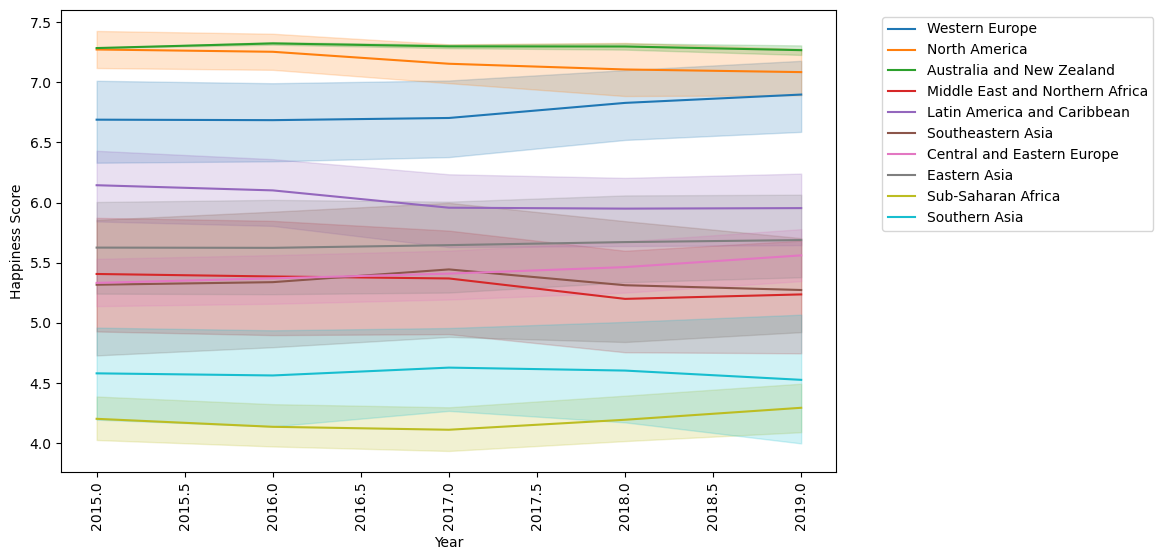

In [8]:
#create a line chart for Happiness score of the different regions

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness Score', data=df_sub, hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [9]:
#creating another subset to look at Germany only, in order to keep the time-series analysis simple.
data_sub = df.loc[df["Country"] == "Germany"]
data_sub = data_sub.reset_index()
data_sub

,index,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,25,Germany,Western Europe,26,6.750,1.327920,1.29937,0.891860,0.614770,0.218430,0.282140,2015
1,15,Germany,Western Europe,16,6.994,1.447870,1.09774,0.814870,0.534660,0.285510,0.304520,2016
2,15,Germany,Western Europe,16,6.951,1.487923,1.47252,0.798951,0.562511,0.276732,0.336269,2017
3,14,Germany,Western Europe,15,6.965,1.340000,1.47400,0.861000,0.586000,0.280000,0.273000,2018
4,16,Germany,Western Europe,17,6.985,1.373000,1.45400,0.987000,0.495000,0.265000,0.261000,2019


In [10]:
#drop irrelevant columns except for Happiness Score and Year
data_sub = data_sub.drop(columns = ["Country", "Happiness Rank", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)",
                           "Freedom", "Trust (Government Corruption)", "Generosity", "Region", "index"])
data_sub

,Happiness Score,Year
0,6.750,2015
1,6.994,2016
2,6.951,2017
3,6.965,2018
4,6.985,2019


In [11]:
#create a datetime column based on Year
from datetime import datetime
data_sub["datetime"]=pd.to_datetime(data_sub["Year"])
data_sub

,Happiness Score,Year,datetime
0,6.750,2015,1970-01-01 00:00:00.000002015
1,6.994,2016,1970-01-01 00:00:00.000002016
2,6.951,2017,1970-01-01 00:00:00.000002017
3,6.965,2018,1970-01-01 00:00:00.000002018
4,6.985,2019,1970-01-01 00:00:00.000002019


In [12]:
#change datetime to correct format
data_sub.loc[data_sub["datetime"] == "1970-01-01 00:00:00.000002015", ["datetime"]] = "2015-01-01 00:00:00"
data_sub.loc[data_sub["datetime"] == "1970-01-01 00:00:00.000002016", ["datetime"]] = "2016-01-01 00:00:00"
data_sub.loc[data_sub["datetime"] == "1970-01-01 00:00:00.000002017", ["datetime"]] = "2017-01-01 00:00:00"
data_sub.loc[data_sub["datetime"] == "1970-01-01 00:00:00.000002018", ["datetime"]] = "2018-01-01 00:00:00"
data_sub.loc[data_sub["datetime"] == "1970-01-01 00:00:00.000002019", ["datetime"]] = "2019-01-01 00:00:00"
data_sub

,Happiness Score,Year,datetime
0,6.750,2015,2015-01-01
1,6.994,2016,2016-01-01
2,6.951,2017,2017-01-01
3,6.965,2018,2018-01-01
4,6.985,2019,2019-01-01


In [13]:
#set the datetime column as the index
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.
data_sub.head()

,Happiness Score
datetime,
2015-01-01,6.750
2016-01-01,6.994
2017-01-01,6.951
2018-01-01,6.965
2019-01-01,6.985


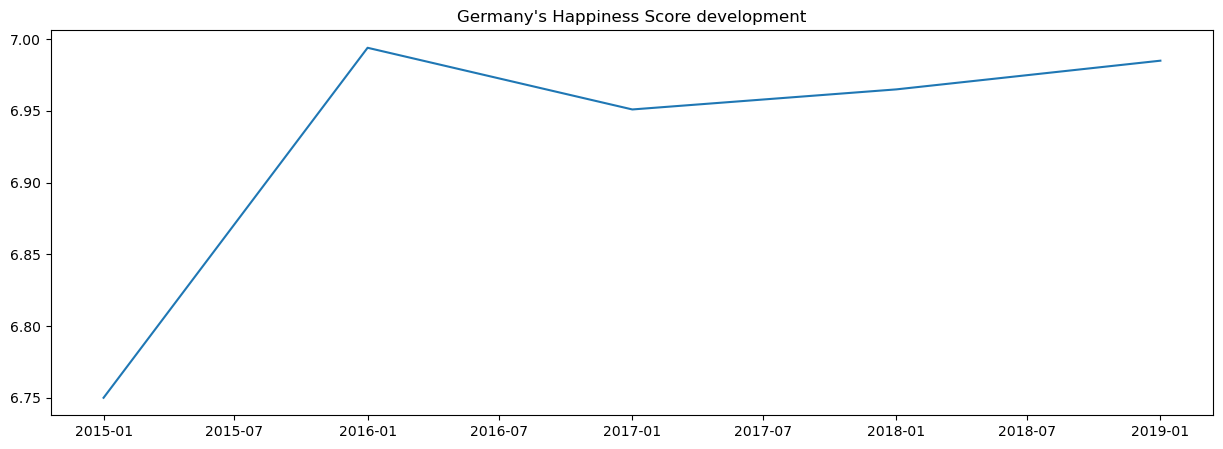

In [14]:
#create a line chart for Germany's Happines Score
plt.figure(figsize=(15,5), dpi=100)
plt.title("Germany's Happiness Score development")
plt.plot(data_sub)

In [15]:
#check for missing values
data_sub.isnull().sum() 

Happiness Score    0
dtype: int64

In [16]:
#check for duplicates
dups = data_sub.duplicated()
dups.sum()

# No dups!

0

# 3. Decomposition

In [17]:
#decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

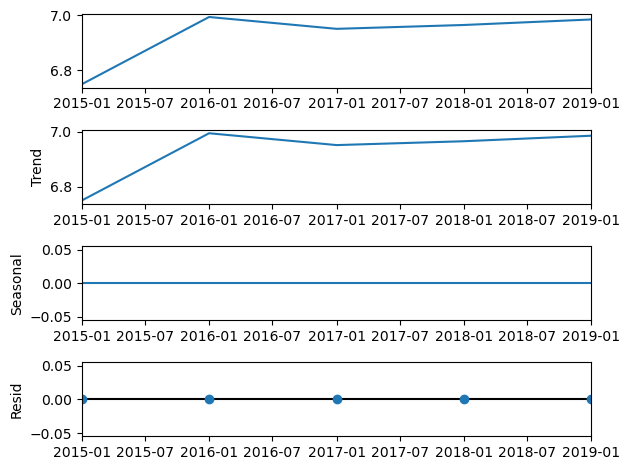

In [18]:
#create a decomposition plot
decomposition.plot()
plt.show()

## Interpretation of Decomposition chart:
In this decomposition chart I can tell that there is no seasonality in Germany's Happiness score. There was a slight upward trend from 2015 to 2016 but the Score has stayed consistent afterwards.

# 4. Dickey Fuller test

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Happiness Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.396901e+01
p-value                        4.379724e-26
Number of Lags Used            0.000000e+00
Number of Observations Used    4.000000e+00
Critical Value (1%)           -7.355441e+00
Critical Value (5%)           -4.474365e+00
Critical Value (10%)          -3.126933e+00
dtype: float64


### Interpretation of Dickey Fuller test:
According to the statistics, the t-score of -13.9 is smaller than all critical values at 1%,5% and 10%. Additionally, with a p-value below 0.05, which makes the test result significant, I can reject the null hypothesis that there is a unit root in my data. The data is stationary.

# 5. Autocorrelation plot

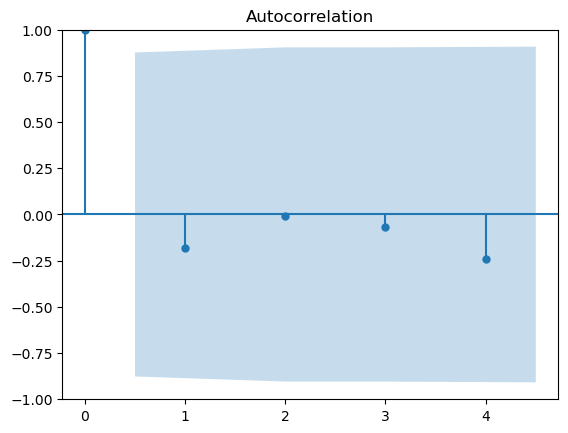

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### Interpretation of autocorrelation plot:
The data has few time-related observations, which is also a data limitation that I have at hand. Nevertheless, it shows one lag outside of the confidence interval and 4 inside, which indicates that there is no autocorrelation in my data and it also indicates stationarity.